# Pandas 3
### Bryant McArthur
### Volume 3
### September 13, 2022

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [27]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    
    df = pd.read_csv("college.csv")
    
    # student facult ratio
    stud_fac = df.groupby(["Private"])["S.F.Ratio"].describe()
    stud_fac_array = stud_fac.loc[stud_fac["mean"].idxmax()].values
    
    # Top 10 percent
    ten_per = df.groupby("Private")["Top10perc"].describe()
    ten_per_array = ten_per.loc[ten_per["mean"].idxmax()].values
    
    # Top 25 Percent
    twenty5 = df.groupby("Private")["Top25perc"].describe()
    twenty5_array = twenty5.loc[twenty5["mean"].idxmax()].values
    
    return (stud_fac_array, ten_per_array, twenty5_array)
    
prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

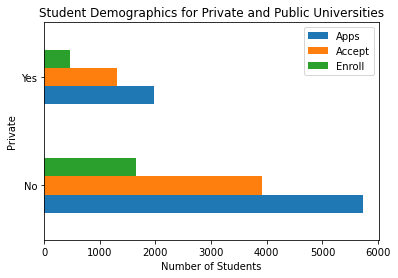

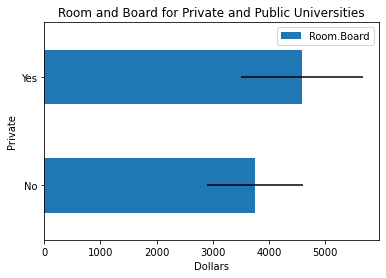

In [39]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    df = pd.read_csv("college.csv")
    
    # Question 1
    Private = df.groupby("Private")
    Private[["Apps", "Accept", "Enroll"]].mean().plot(kind="barh", 
                                                      title="Student Demographics for Private and Public Universities")
    plt.xlabel("Number of Students")
    
    # Question 2
    Private[["Room.Board"]].mean().plot(kind="barh", xerr=Private.std(), 
                                        title="Room and Board for Private and Public Universities")
    plt.xlabel("Dollars")
    
prob2()

# Problem 3

In [52]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    df = pd.read_csv("Ohio_1999.csv")
    
    # Race/Sex combo with highest Usual Weekly Earnings
    highest_earnings = df.pivot_table(values="Usual Weekly Earnings", index=["Race", "Sex"], aggfunc="sum").idxmax().values
    
    # Race/Sex combo with lowest cumulative Usual Hours Worked
    lowest_worked = df.pivot_table(values="Usual Hours Worked", index=["Race", "Sex"], aggfunc="sum").idxmin().values
    
    # Race/Sex combo with higheset average Usual Hours Worked
    highest_worked = df.pivot_table(values="Usual Hours Worked", index=["Race", "Sex"], aggfunc="mean").idxmax().values
    
    return tuple(highest_earnings)[0], tuple(lowest_worked)[0], tuple(highest_worked)[0]
    
prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [82]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    df = pd.read_csv("Ohio_1999.csv")
    
    # Question 1
    degree = pd.cut(df["Educational Attainment"], [0,38,42,46])
    ans_1 = degree.value_counts().idxmax()
    
    # Question 2
    age = pd.qcut(df["Age"], 6)
    ans_2 = df.pivot_table(values="Usual Hours Worked", index=[age], aggfunc="mean").idxmax().values
    
    # Question 3
    table = df.pivot_table(values="Yearly Salary", index=[age, degree], aggfunc="mean")
    ans_3 = table.idxmin().values
    
    return ans_1, ans_2, ans_3
    
    
prob4()

(Interval(38, 42, closed='right'),
 array([Interval(40.0, 46.0, closed='right')], dtype=object),
 array([(Interval(15.999, 29.0, closed='right'), Interval(0, 38, closed='right'))],
       dtype=object))

# Problem 5

<ipython-input-125-72f94de3f934>:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Private")["Expend", "perc.alumni"].plot(kind="scatter", x="perc.alumni", y="Expend")


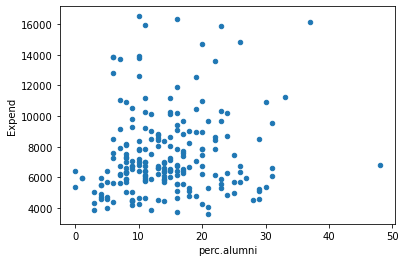

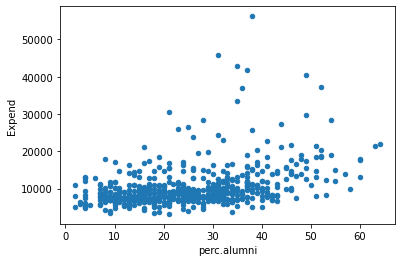

Apps                                             \
                       count          mean          std    min      25%   
Private Grad.Rate                                                         
No      (9.999, 51.0]   83.0   3189.867470  2455.076035  233.0  1428.00   
        (51.0, 61.0]    56.0   5284.089286  3154.712384  818.0  3101.00   
        (61.0, 70.0]    40.0   8048.875000  5426.000110  441.0  3254.50   
        (70.0, 81.0]    23.0  10720.347826  9761.417877  572.0  5707.50   
        (81.0, 118.0]   10.0   8555.200000  6545.939926  950.0  2269.50   
Yes     (9.999, 51.0]   78.0   1138.615385  1701.665832  152.0   393.75   
        (51.0, 61.0]    98.0    979.336735  1076.351033   81.0   494.75   
        (61.0, 70.0]   122.0   1782.540984  1869.590816  167.0   768.75   
        (70.0, 81.0]   129.0   1982.062016  2753.818916  141.0   672.00   
        (81.0, 118.0]  138.0   3330.340580  2994.305782  245.0  1432.00   

                                                 Accept               ...  \
                          50%       75%      max  count         mean  ...   
Private Grad.Rate                                                     ...   
No      (9.999, 51.0]  2409.0   4601.50  12809.0   83.0  2315.349398  ...   
        (51.0, 61.0]   4670.0   7009.50  15039.0   56.0  3651.553571  ...   
        (61.0, 70.0]   7620.5  11526.25  21804.0   40.0  5791.925000  ...   
        (70.0, 81.0]   8065.0  14682.00  48094.0   23.0  6808.869565  ...   
        (81.0, 118.0]  8178.0  13752.75  19152.0   10.0  4594.700000  ...   
Yes     (9.999, 51.0]   630.0   1085.25  11901.0   78.0   866.051282  ...   
        (51.0, 61.0]    685.0   1065.00   7428.0   98.0   767.010204  ...   
        (61.0, 70.0]   1196.0   1946.00  12229.0  122.0  1319.442623  ...   
        (70.0, 81.0]   1160.0   1910.00  20192.0  129.0  1453.705426  ...   
        (81.0, 118.0]  2423.0   3827.25  13865.0  138.0  1786.253623  ...   

                         Expend          Grad.Rate                             \
                            75%      max     count       mean       std   min   
Private Grad.Rate                                                               
No      (9.999, 51.0]   7415.50  16352.0      83.0  42.277108  7.595431  10.0   
        (51.0, 61.0]    7892.50  13889.0      56.0  55.946429  2.658911  52.0   
        (61.0, 70.0]    8999.25  16527.0      40.0  65.250000  2.328750  62.0   
        (70.0, 81.0]   10326.00  13919.0      23.0  75.347826  3.241895  71.0   
        (81.0, 118.0]  12581.25  15893.0      10.0  89.600000  6.328068  83.0   
Yes     (9.999, 51.0]   9385.50  42926.0      78.0  41.230769  9.523618  15.0   
        (51.0, 61.0]    9483.00  19016.0      98.0  56.408163  3.031915  52.0   
        (61.0, 70.0]   10475.25  19733.0     122.0  66.081967  2.437958  62.0   
        (70.0, 81.0]   12082.00  26037.0     129.0  75.720930  3.149843  71.0   
        (81.0, 118.0]  16965.00  56233.0     138.0  89.927536  6.261501  82.0   

                                                 
                         25%   50%   75%    max  
Private Grad.Rate                                
No      (9.999, 51.0]  37.00  45.0  48.0   51.0  
        (51.0, 61.0]   53.00  56.0  58.0   61.0  
        (61.0, 70.0]   63.00  65.0  67.0   70.0  
        (70.0, 81.0]   72.50  75.0  77.5   81.0  
        (81.0, 118.0]  84.25  87.0  94.5  100.0  
Yes     (9.999, 51.0]  36.25  45.0  48.0   51.0  
        (51.0, 61.0]   54.00  56.0  59.0   61.0  
        (61.0, 70.0]   64.00  66.0  68.0   70.0  
        (70.0, 81.0]   73.00  75.0  79.0   81.0  
        (81.0, 118.0]  84.00  90.0  95.0  118.0  

[10 rows x 136 columns]

<ipython-input-125-72f94de3f934>:44: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Private")["Top10perc", "Accept"].idxmin().plot(kind='barh')
<ipython-input-125-72f94de3f934>:46: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Private")["Top10perc", "Accept"].idxmax().plot(kind='barh')


(False,
 True,
 True,
 'Because Private Universities who are more selective will only higher quality students.')

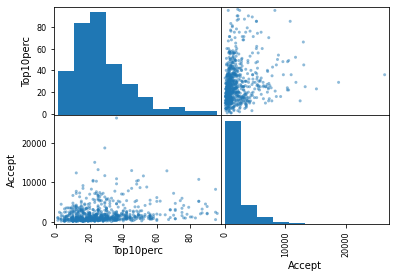

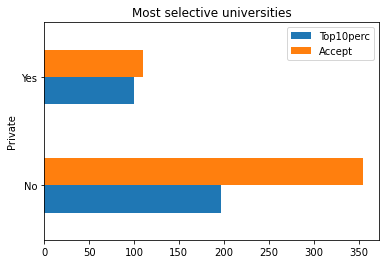

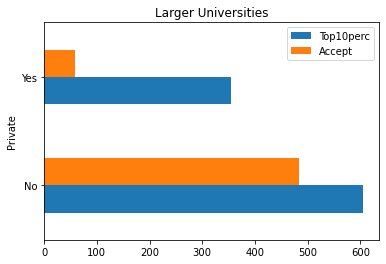

In [125]:
def prob5():
    """
    Use pivot tables and groupby objects on the data in
    College.csv to answer the following questions:
        1. Is there a correlation between the percent of alumni
           that donate and the amount the school spends per
           student in both private and public universities?
        2. Is the graduation rate partition with the greatest
           number of schools the same for private and public
           universities?
        3. Is there an inverse correlation between acceptance
           rate and having students from the top 10% of their
           high school class?
        4. Why is the average percentage of students admitted
           from the top 10 percent of their high school class
           so high in private universities with very low
           acceptance rates? Use only the data to explain why; 
           do not extrapolate.
    
    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    df = pd.read_csv("College.csv")
    
    # Question 1
    df.groupby("Private")["Expend", "perc.alumni"].plot(kind="scatter", x="perc.alumni", y="Expend")
    plt.show()
    ans1 = False
    
    # Question 2
    grad_rate = pd.qcut(df["Grad.Rate"],5)
    display(df.groupby(["Private", grad_rate]).describe())
    ans2 = False
    
    # Question 3
    pd.plotting.scatter_matrix(df[['Top10perc', 'Accept']])
    ans3 = False
    
    # Question 4
    df.groupby("Private")["Top10perc", "Accept"].idxmin().plot(kind='barh')
    plt.title("Most selective universities")
    df.groupby("Private")["Top10perc", "Accept"].idxmax().plot(kind='barh')
    plt.title("Larger Universities")
    ans4 = "Because Private Universities who are more selective will only higher quality students."
    
    return ans1, ans2, ans3, ans4

prob5()